<a href="https://colab.research.google.com/github/vishwannth/Big_mart_sales-analysis/blob/main/big_mart_sales_prediction_using_gradient_boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


### 1.Importing Libraries

In [3]:
#Lets import the required libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

### 2. Data Acquisition and Description

In [5]:
#Let's load our train and test dataset
train = pd.read_csv("/content/drive/MyDrive/BDA project/Dataset/train.csv")
test = pd.read_csv("/content/drive/MyDrive/BDA project/Dataset/test.csv")

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
sample_submission = pd.read_csv('/content/drive/MyDrive/BDA project/Dataset/sample_submission.csv')

In [9]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [10]:
#Lets look at the shape of your dataset
train.shape

(8523, 12)

In [11]:
# Lets look at the train.info()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [12]:
# Check for missing values
train.isna().sum().sort_values(ascending=False)#to find the number of missing value in the data in decending order

Outlet_Size                  2410
Item_Weight                  1463
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
#Lets look at the discription also
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [18]:
# Lets look at the skewness of the numerical columns
num_columns = train.select_dtypes(include=['float64','int64'])
#print(num_columns) #optional
skewness = num_columns.apply(lambda x:x.skew())
print('Skewness of the numerical columns: \n',skewness)
#skewness is to find the statistical mesure of the assymmentric distribution of the data

Skewness of the numerical columns: 
 Item_Weight                  0.082426
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64


In [19]:
#Lets check for duplicate rows of data
train.duplicated().any()

False

In [20]:
#Lets check for Cardinality(unique values in the column)
train.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

**Observations**:
- Shape of our Dataset is : (8523, 12)
- We have missing values in : Outlet_Size & Item_Weight .
- **Item_Outlet_Sales** is our target column.
- Few of the features have very less skewness. Data is almost normally distributed. No column with very high skewness.
- We don't have any duplicate rows.
- Few features have very high cardinality like **Item_Visibility,Item_MRP,Item_Outlet_Sales**.
- dtype of all the columns looks fine.


### 3.Exploratory Data Analysis

In [21]:
# Before imputing the missing values let's do a simple EDA to check any inconsistency or outliers in our dataset


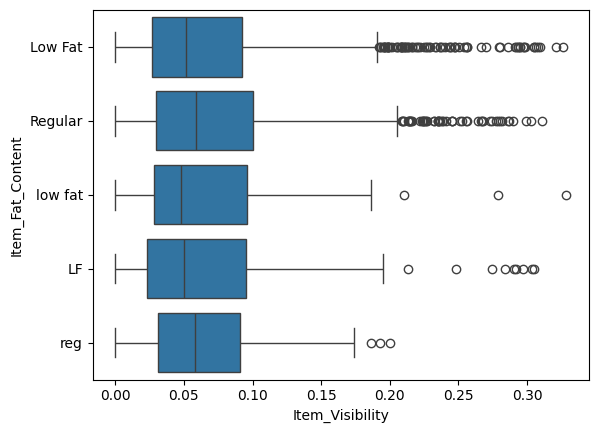

In [23]:
# Lets look at the columns Item_Visibility and Item_Fat_Content
sns.boxplot(x = train['Item_Visibility'], y = train['Item_Fat_Content'])
plt.show()
#commit vannakm da mapla

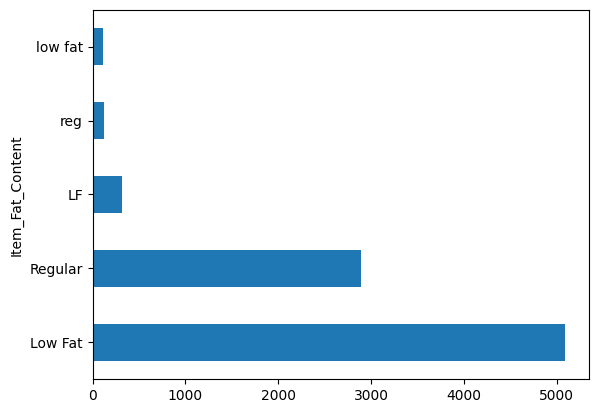

In [ ]:
# Lets look at the column Item_Fat_Content
train['Item_Fat_Content'].value_counts().plot(kind='barh')
plt.show()

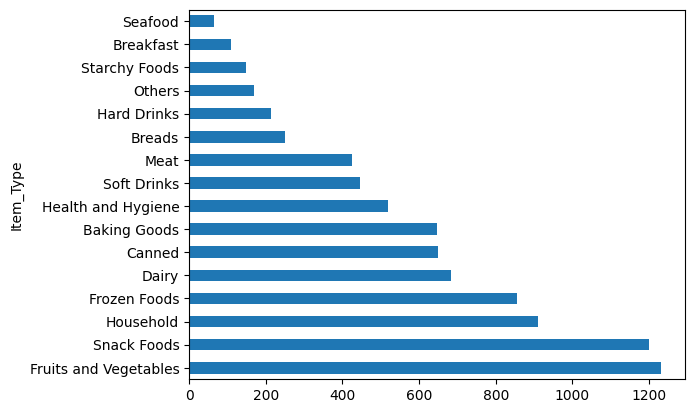

In [ ]:
# Lets look at Item_Type column
train['Item_Type'].value_counts().plot(kind='barh')
plt.show()

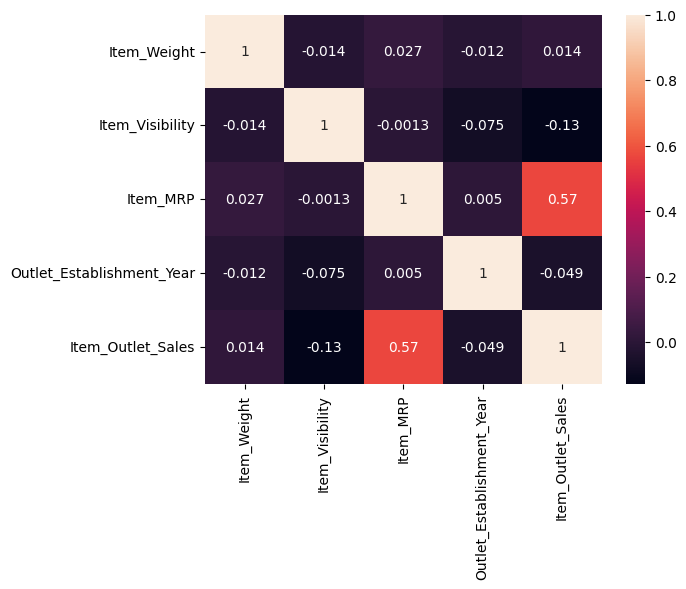

In [ ]:
# Lets look at the heatmap for the co-relation
sns.heatmap(num_columns.corr(),annot=True)
plt.show()

**Observations**:
- We have few inconsistencies in Item_Fat_Content
- Few columns have some amount of co-relation like Item_MRP and Item_Outlet_Sales.

### 4.Data Preprocessing

In [ ]:
#Now lets prepare our Data for Modeling

In [ ]:
# I have made a User defined function to impute the missing values
# and remove isconsistencies in 'Item_Fat_Content'
# Lets also make a new column to check the Years of Service

In [ ]:
def data_prep(train):
  train['Item_Weight'] = np.where(train['Item_Weight'].isna(),train['Item_Weight'].median(skipna = True),train['Item_Weight'])
  train['Outlet_Size'] = np.where(train['Outlet_Size'].isna(),train['Outlet_Size'].mode()[0], train['Outlet_Size'])
  train['Item_Fat_Content'] = train['Item_Fat_Content'].replace('low fat', 'Low Fat')
  train['Item_Fat_Content'] = train['Item_Fat_Content'].replace('LF', 'Low Fat')
  train['Item_Fat_Content'] = train['Item_Fat_Content'].replace('reg', 'Regular')
  train['YOB'] = 2023 - train['Outlet_Establishment_Year']
  return train

In [ ]:
train_new = data_prep(train)

In [ ]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  YOB                        8523 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage:

In [ ]:
#Lets look at the 'Item_Fat_Content'
train['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [ ]:
# Lets do a chi-square test to check the co-relation

In [ ]:
train['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [ ]:
train_new['Outlet_Size'].value_counts()

Outlet_Size
Medium    5203
Small     2388
High       932
Name: count, dtype: int64

In [ ]:
train_new['Outlet_Location_Type'].value_counts()

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

In [ ]:
pd.crosstab(train_new['Outlet_Size'], train_new['Outlet_Location_Type'])

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,932
Medium,930,1855,2418
Small,1458,930,0


In [ ]:
# Lets import chi2 contingency
from scipy.stats import chi2_contingency

In [ ]:
# Lets define a function for chi square test
def chi_sq_test(var1, var2):
  cont_table = pd.crosstab(var1, var2)
  _,p,_,_ = chi2_contingency(cont_table)
  if p < 0.05:
    print('Accept the Alternate Hypothesis (There is a realation between var1 and var2)', round(p, 2))
  else:
    print('Failed to Reject Null Hypothesis (There is no relation between var1 and var2)', round(p, 2))
  return cont_table

In [ ]:
chi_sq_test(train_new['Outlet_Size'], train_new['Outlet_Location_Type'])

Accept the Alternate Hypothesis (There is a realation between var1 and var2) 0.0


Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,932
Medium,930,1855,2418
Small,1458,930,0


In [ ]:
chi_sq_test(train_new['Item_Fat_Content'], train_new['Item_Type'])

Accept the Alternate Hypothesis (There is a realation between var1 and var2) 0.0


Item_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
Item_Fat_Content,,,,,,,,,,,,,,,,
Low Fat,329,140,41,341,418,450,630,214,520,910,170,169,37,692,374,82
Regular,319,111,69,308,264,406,602,0,0,0,255,0,27,508,71,66


### 5.Data Preparation

In [ ]:
# Lets prepare our Data for Modelling

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  YOB                        8523 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage:

In [ ]:
train_new.drop(['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year'], inplace = True, axis = 1)

In [ ]:
train_new.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'YOB'],
      dtype='object')

In [ ]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           8523 non-null   float64
 1   Item_Fat_Content      8523 non-null   object 
 2   Item_Visibility       8523 non-null   float64
 3   Item_Type             8523 non-null   object 
 4   Item_MRP              8523 non-null   float64
 5   Outlet_Size           8523 non-null   object 
 6   Outlet_Location_Type  8523 non-null   object 
 7   Outlet_Type           8523 non-null   object 
 8   Item_Outlet_Sales     8523 non-null   float64
 9   YOB                   8523 non-null   int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


In [ ]:
train_new = pd.get_dummies(train_new, columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size','Outlet_Location_Type','Outlet_Type'])

In [ ]:
train_new.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,YOB,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,3735.1380,24,True,False,False,False,False,...,False,True,False,True,False,False,False,True,False,False
1,5.92,0.019278,48.2692,443.4228,14,False,True,False,False,False,...,False,True,False,False,False,True,False,False,True,False
2,17.50,0.016760,141.6180,2097.2700,24,True,False,False,False,False,...,False,True,False,True,False,False,False,True,False,False
3,19.20,0.000000,182.0950,732.3800,25,False,True,False,False,False,...,False,True,False,False,False,True,True,False,False,False
4,8.93,0.000000,53.8614,994.7052,36,True,False,False,False,False,...,True,False,False,False,False,True,False,True,False,False


In [ ]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8523 non-null   float64
 1   Item_Visibility                  8523 non-null   float64
 2   Item_MRP                         8523 non-null   float64
 3   Item_Outlet_Sales                8523 non-null   float64
 4   YOB                              8523 non-null   int64  
 5   Item_Fat_Content_Low Fat         8523 non-null   bool   
 6   Item_Fat_Content_Regular         8523 non-null   bool   
 7   Item_Type_Baking Goods           8523 non-null   bool   
 8   Item_Type_Breads                 8523 non-null   bool   
 9   Item_Type_Breakfast              8523 non-null   bool   
 10  Item_Type_Canned                 8523 non-null   bool   
 11  Item_Type_Dairy                  8523 non-null   bool   
 12  Item_Type_Frozen Foo

### 6.Data Modelling

In [ ]:
#First things first
# Lets devide our Dataset in X and y

In [ ]:
y = train_new['Item_Outlet_Sales']
x = train_new.drop(['Item_Outlet_Sales'], axis = 1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 15)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6392, 32)
(2131, 32)
(6392,)
(2131,)


#### 6.1 Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr_train = lr.predict(x_train)
lr_test = lr.predict(x_test)

In [ ]:
#Lets define a function for Model Evaluation
def model_eval(actual, predicted):
  rmse = np.sqrt(mean_squared_error(actual, predicted))
  r2 = r2_score(actual, predicted)
  print('The RMSE value for the model is: ', round(rmse,2))
  print('The R2 Score for the model is: ', round(r2, 2))

In [ ]:
model_eval(y_train, lr_train)

The RMSE value for the model is:  1114.72
The R2 Score for the model is:  0.56


In [ ]:
model_eval(y_test, lr_test)

The RMSE value for the model is:  1169.02
The R2 Score for the model is:  0.57


#### 6.2 Random Forest Regressor

In [ ]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
rf_preds_train = rf.predict(x_train)
rf_preds_test = rf.predict(x_test)

In [ ]:
model_eval(y_train, rf_preds_train)

The RMSE value for the model is:  421.84
The R2 Score for the model is:  0.94


In [ ]:
model_eval(y_test, rf_preds_test)

The RMSE value for the model is:  1177.54
The R2 Score for the model is:  0.56


#### 6.3Ada Boost Regressor


In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
ada = AdaBoostRegressor()
ada.fit(x_train, y_train)
preds_ada_train = ada.predict(x_train)
preds_ada_test = ada.predict(x_test)

In [ ]:
model_eval(y_train, preds_ada_train)

The RMSE value for the model is:  1177.03
The R2 Score for the model is:  0.51


In [ ]:
model_eval(y_test, preds_ada_test)

The RMSE value for the model is:  1226.14
The R2 Score for the model is:  0.53


In [ ]:
# Lets look at the feature importance
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(x_train.columns, ada.feature_importances_):
    feats[feature] = importance

In [ ]:
feats

{'Item_Weight': 0.026081177162710256,
 'Item_Visibility': 0.05459371759238731,
 'Item_MRP': 0.58589624732365,
 'YOB': 0.010475039719901024,
 'Item_Fat_Content_Low Fat': 0.0064210485017779685,
 'Item_Fat_Content_Regular': 0.0,
 'Item_Type_Baking Goods': 0.0,
 'Item_Type_Breads': 0.0,
 'Item_Type_Breakfast': 0.0,
 'Item_Type_Canned': 0.0023557060651082044,
 'Item_Type_Dairy': 0.015278072891690048,
 'Item_Type_Frozen Foods': 0.0,
 'Item_Type_Fruits and Vegetables': 0.0,
 'Item_Type_Hard Drinks': 0.0,
 'Item_Type_Health and Hygiene': 0.0,
 'Item_Type_Household': 0.006298335797523094,
 'Item_Type_Meat': 1.4443176462274294e-05,
 'Item_Type_Others': 0.0,
 'Item_Type_Seafood': 0.0,
 'Item_Type_Snack Foods': 0.0,
 'Item_Type_Soft Drinks': 0.0,
 'Item_Type_Starchy Foods': 0.0,
 'Outlet_Size_High': 0.0,
 'Outlet_Size_Medium': 0.0,
 'Outlet_Size_Small': 9.964723635275443e-05,
 'Outlet_Location_Type_Tier 1': 0.014846468078321294,
 'Outlet_Location_Type_Tier 2': 0.012530017116605677,
 'Outlet_Locati

#### 6.4 Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gb = GradientBoostingRegressor()
gb.fit(x_train, y_train)
preds_gb_train = gb.predict(x_train)
preds_gb_test = gb.predict(x_test)

In [ ]:
model_eval(y_train, preds_gb_train)

The RMSE value for the model is:  1018.99
The R2 Score for the model is:  0.63


In [ ]:
model_eval(y_test,preds_gb_test )

The RMSE value for the model is:  1118.09
The R2 Score for the model is:  0.61


#### 6.5 XG Boost Regressor

In [ ]:
import xgboost as xg

In [ ]:
xgb = xg.XGBRegressor()

In [ ]:
xgb.fit(x_train, y_train)
preds_xgb_train = xgb.predict(x_train)
preds_xgb_test = xgb.predict(x_test)

In [ ]:
model_eval(y_train, preds_xgb_train)

The RMSE value for the model is:  612.41
The R2 Score for the model is:  0.87


In [ ]:
model_eval(y_test, preds_xgb_test)

The RMSE value for the model is:  1226.4
The R2 Score for the model is:  0.53


#### 6.5 SGD Regressor

In [ ]:
from sklearn.linear_model import SGDRegressor

In [ ]:
sgd = SGDRegressor()
sgd.fit(x_train, y_train)
preds_train_sgd = sgd.predict(x_train)
preds_test_sgd = sgd.predict(x_test)

In [ ]:
model_eval(y_train,preds_train_sgd )

The RMSE value for the model is:  2168710449635.89
The R2 Score for the model is:  -1.6665699331960494e+18


In [ ]:
model_eval(y_test, preds_test_sgd)

The RMSE value for the model is:  2169484189345.37
The R2 Score for the model is:  -1.4800767555581184e+18


### 7.Hypertuning

In [ ]:
# Lets try and hypertune our model and see if we can further improve the RMSE and R2 Score

In [ ]:
#Based on the bias variance trade off I have tried to hypertune Gradient Boosting Regressor using RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Number of estimators
n_estimators = [int(x) for x in np.linspace(start=50, stop=300, num=10)]

# Number of features to consider at every split
max_features = ['log2', 'sqrt']

# Maximum number of levels
max_depth = [int(x) for x in np.linspace(3, 15, num=5)] + [None]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Learning Rate
l_rate = [0.01, 0.05, 0.1, 0.5]

In [ ]:
# Create the random grid
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'learning_rate': l_rate
}


In [ ]:
# Randomized Search CV setup
gb_clf = RandomizedSearchCV(estimator=gb, param_distributions=random_grid, n_iter=100, cv=3, random_state=123, n_jobs=-1)

In [ ]:
# Lets fit the Randomized Search CV to our data
gb_clf.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.5],
                                        'max_depth': [3, 6, 9, 12, 15, None],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 77, 105, 133, 161,
                                                         188, 216, 244, 272,
                                                         300]},
                   random_state=123)

In [ ]:
# Get the best parameters and best score
print("Best Parameters:", gb_clf.best_params_)
print("Best Score:", gb_clf.best_score_)

Best Parameters: {'n_estimators': 244, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 3, 'learning_rate': 0.05}
Best Score: 0.5869645713629928


In [ ]:
gb2 = GradientBoostingRegressor(n_estimators=105,min_samples_split= 2,min_samples_leaf= 1,
                                max_features='sqrt',max_depth= 3,learning_rate= 0.1)
gb2.fit(x_train, y_train)
preds_gb2_train = gb2.predict(x_train)
preds_gb2_test = gb2.predict(x_test)

In [ ]:
model_eval(y_train, preds_gb2_train)

The RMSE value for the model is:  1053.54
The R2 Score for the model is:  0.61


In [ ]:
model_eval(y_test,preds_gb2_test )

The RMSE value for the model is:  1143.02
The R2 Score for the model is:  0.59


### 8.Test Data Application

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [ ]:
data_prep(test)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,YOB
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,24
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,16
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,25
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1,16
4,FDY38,12.500,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,38
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,26
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,14
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1,21
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1,16


In [ ]:
test['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    3668
Regular    2013
Name: count, dtype: int64

In [ ]:
test.drop(['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year'], inplace = True, axis = 1)

In [ ]:
test_new = pd.get_dummies(test, columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size','Outlet_Location_Type','Outlet_Type'])

In [ ]:
test_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      5681 non-null   float64
 1   Item_Visibility                  5681 non-null   float64
 2   Item_MRP                         5681 non-null   float64
 3   YOB                              5681 non-null   int64  
 4   Item_Fat_Content_Low Fat         5681 non-null   bool   
 5   Item_Fat_Content_Regular         5681 non-null   bool   
 6   Item_Type_Baking Goods           5681 non-null   bool   
 7   Item_Type_Breads                 5681 non-null   bool   
 8   Item_Type_Breakfast              5681 non-null   bool   
 9   Item_Type_Canned                 5681 non-null   bool   
 10  Item_Type_Dairy                  5681 non-null   bool   
 11  Item_Type_Frozen Foods           5681 non-null   bool   
 12  Item_Type_Fruits and

In [ ]:
test_new['Item_Outlet_Sales'] = gb2.predict(test_new)

In [ ]:
test_new.head()

,Item_Weight,Item_Visibility,Item_MRP,YOB,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Outlet_Sales
0,20.750,0.007565,107.8622,24,True,False,False,False,False,False,...,True,False,True,False,False,False,True,False,False,1629.212393
1,8.300,0.038428,87.3198,16,False,True,False,False,False,False,...,True,False,False,True,False,False,True,False,False,1412.868264
2,14.600,0.099575,241.7538,25,True,False,False,False,False,False,...,True,False,False,False,True,True,False,False,False,1248.060418
3,7.315,0.015388,155.0340,16,True,False,False,False,False,False,...,True,False,False,True,False,False,True,False,False,2681.648129
4,12.500,0.118599,234.2300,38,False,True,False,False,False,False,...,True,False,False,False,True,False,False,False,True,5177.760218


In [ ]:
test_new['Item_Outlet_Sales'] = abs(test_new['Item_Outlet_Sales'])

In [ ]:
sample_submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000


In [ ]:
sample_submission['Item_Outlet_Sales'] = test_new['Item_Outlet_Sales']

In [ ]:
sample_submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1629.212393
1,FDW14,OUT017,1412.868264
2,NCN55,OUT010,1248.060418
3,FDQ58,OUT017,2681.648129
4,FDY38,OUT027,5177.760218


In [ ]:
sample_submission.to_csv('final_output.csv', index = False)

In [ ]:
import pickle

In [ ]:
filename = 'finalized_model.sav'
pickle.dump(gb, open(filename, 'wb'))

> **If you have any question please comment below.**


> **If you like my Notebook please Upvote**

#### Thank-you..!!